In [1]:
from utils.load_dataset import PlantVillageDataset
import matplotlib.pyplot as plt
import torch
from torch.utils.data import DataLoader
import cv2
from utils.preprocessing import enhance_img
import numpy as np

In [2]:
# Load the dataset
PATH = './Plant_leave_diseases_dataset_without_augmentation'
training_data = PlantVillageDataset(PATH, img_mode="LAB", train=True, transform=enhance_img)
test_data = PlantVillageDataset(PATH, img_mode="LAB", train=False, transform=enhance_img)

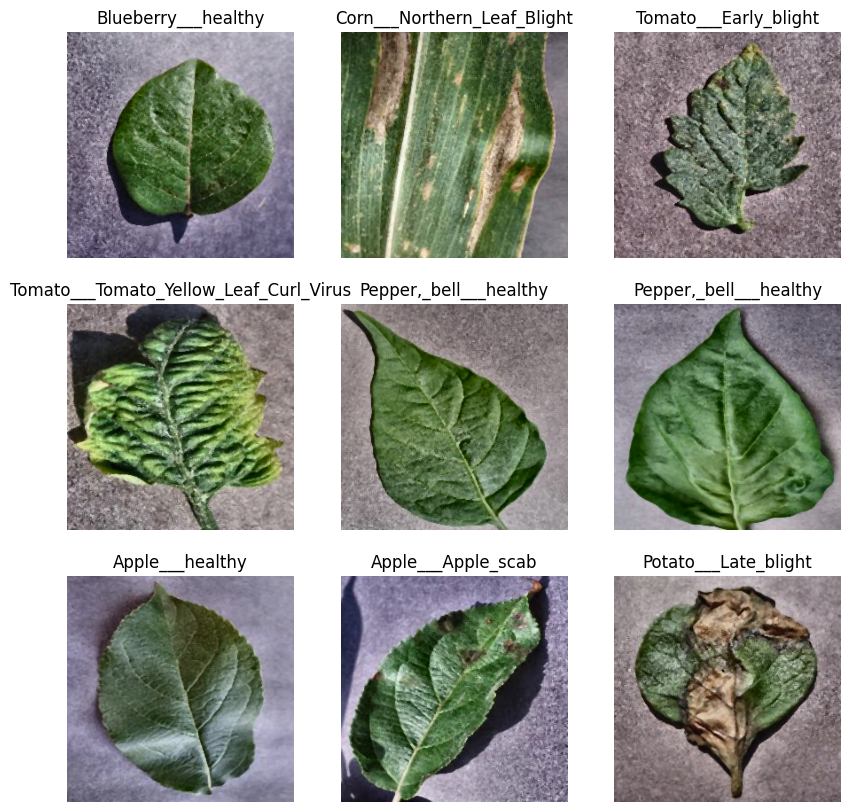

In [3]:
figure = plt.figure(figsize=(10, 10))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(list(training_data.label_to_idx.keys())[label])
    plt.axis("off")
    plt.imshow(img, cmap="gray")
plt.show()

In [4]:
train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)